In [1]:
from google.colab import drive
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import numpy as np
# check tensorflow version
import tensorflow as tf



Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data = np.load('/content/drive/My Drive/CSE140/128Data.npy')

In [0]:
label = np.load('/content/drive/My Drive/CSE140/128Label.npy')

In [5]:
print(np.shape(data))
print(np.shape(label))

(3978, 128, 128)
(3978,)


In [0]:
X = data.reshape(-1, 128, 128, 1)
Y = label.reshape(3978)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [0]:
import gc
X = []
Y = []
gc.collect()


**CNN Model**

In [0]:
# Load some neural network functions we'll be using.
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model

In [0]:
# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

In [10]:
# ensure that the data shape matches the CNN Input shape (check last two entries of the tuple)
print(X.shape)

(3978, 128, 128, 1)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      1088      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 256)       131328    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 256)       0   

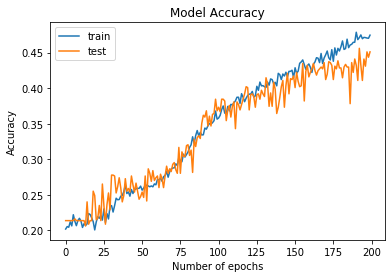

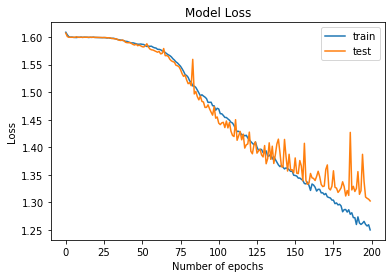

In [0]:
#RMS optimizer with lr=0.00001
#Best results.
ip = Input(shape=(128, 128, 1))

m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(2, 2))(m)

m = Conv2D(128, kernel_size=(3, 3), activation='relu')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)

m = Conv2D(256, kernel_size=(2, 2), activation='relu')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)

m = Conv2D(512, kernel_size=(3, 3), activation='relu')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)
m = Dropout(0.2)(m)

m = Flatten()(m)
m = Dense(1024, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(2048, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(1024, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(512, activation='relu')(m)

op = Dense(5, activation='softmax')(m)
model = Model(ip, op)

# compile the model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
rms = RMSprop(learning_rate=0.00001)#, rho=0.9, momentum=0.2)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = rms,
              metrics = ['acc'])

print(model.summary())

history = model.fit(X_train, Y_train, batch_size=32, epochs=200, validation_data = (X_test, Y_test))
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 126, 126, 128)     1280      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 124, 128)     147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 58, 58, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 29, 29, 32)        0   

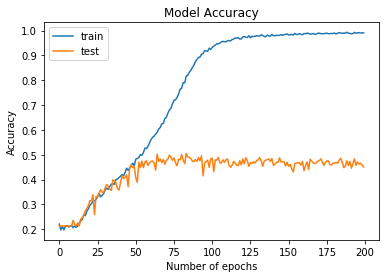

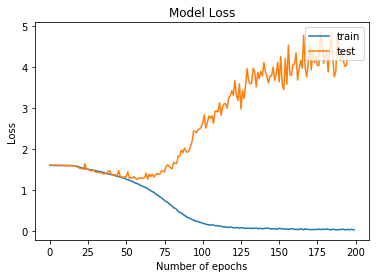

In [0]:
#Double Convolution layers followed by Max pooling layer.
#LR=0.00005
ip = Input(shape=(128, 128, 1))

m = Conv2D(128, kernel_size=(3, 3), activation='relu')(ip)
m = Conv2D(128, kernel_size=(3, 3), activation='relu')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)

m = Conv2D(64, kernel_size=(3, 3), activation='relu')(m)
m = Conv2D(32, kernel_size=(3, 3), activation='relu')(m)
m = MaxPooling2D(pool_size=(2, 2))(m)

m = Dropout(0.2)(m)

m = Flatten()(m)
m = Dense(256, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(1024, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(1024, activation='relu')(m)
m = Dropout(0.2)(m)

m = Dense(512, activation='relu')(m)

op = Dense(5, activation='softmax')(m)
model = Model(ip, op)

# compile the model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
rms = RMSprop(learning_rate=0.00005)#, rho=0.9, momentum=0.2)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = rms,
              metrics = ['acc'])

print(model.summary())

history = model.fit(X_train, Y_train, batch_size=32, epochs=200, validation_data = (X_test, Y_test))
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()